# **Housing Prices correlation**

## Objectives

* Answer business objective 1:
    The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualizations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/HousePricesRecords.csv

## Outputs

* To understand the key attributes that correlate to the sale price. And to generate code that answers business requirement 1 and can be used later to build the Streamlit App


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues'

---

# Load the data

In [5]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

We want to see an overview of the dataset and understand each feature in a business context. We use a Profile Report as it breaks down each feature and allows us to gain a meaningful understanding of all the features including their distribution and if any data is missing.

In [6]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

Now we will use the Spearman and Pearson methods to find the top 10 correlations between the features and the SalePrice.

* The command will return a pandas series and we will drop the first item using '[[1:]]' as this will be comparing SalePrice to SalePrice which will always be 1.
* As a correlation can be negative or positive we will set the values to absolute using 'key=abs'.
* We will run Spearman first then Pearson.

In [7]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

In [8]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

From the methods above we can see that there is strong to moderate levels of correlation between SalePrice and a given feature.

The feature with the highest correlation for both correlation test is OverallQual which is a category question for 1 to 10 (however it is currently recorded as RealNumber) that described the overall condition of a house. 

Now we will consider the top 5 correlation levels and study the associated features

In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Now we know the most correlated features we will investigate if:

* The sale price is typically higher the greater the first floor square feet is.
* The sale price is typically higher the greater the garage square feet is.
* The sale price is typically higher the greater the above ground living area square feet is.
* The sale price is typically higher the better the overall materials and finish of the house is.
* The sale price is typically higher the greater the total square feet of the basement area is.
* The sale price is typically higher the new the house is. 

In [10]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

---

# EDA on the selected variables

We will now filter the data frame to just contain our 6 top correlated features and SalePrice.

In [11]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500
3,961,642,1717,7,756,1915,140000
4,1145,836,2198,8,1145,2000,250000


## Variables Distribution by Sale Price

As we can see that all our variables are numerical so we will only need to plot numerical distribution

I have used a lm plot as it shows the line of best fit but also shows the area around it for deviation.  

<Figure size 1000x500 with 0 Axes>

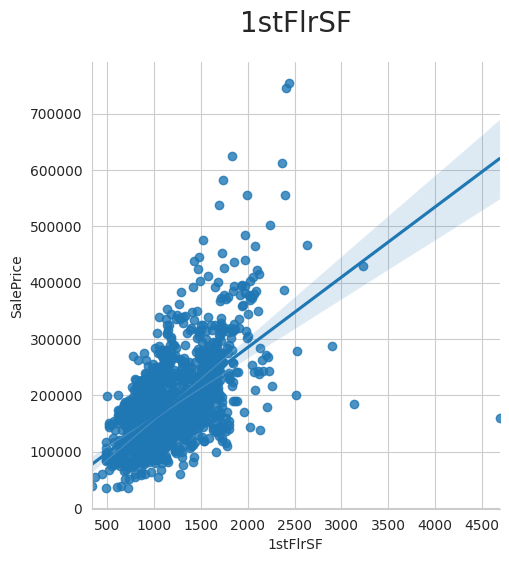

<Figure size 1000x500 with 0 Axes>

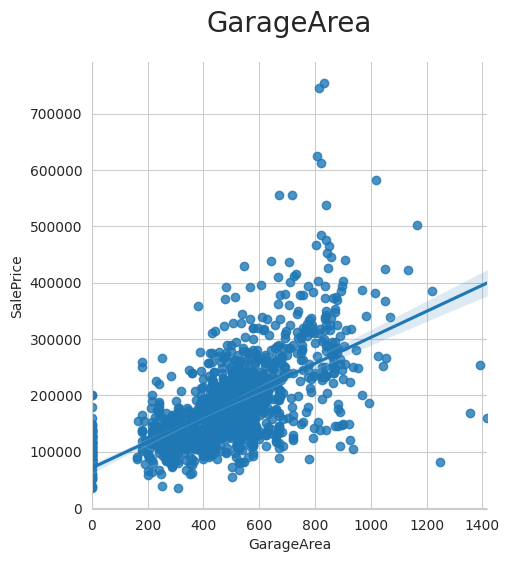

<Figure size 1000x500 with 0 Axes>

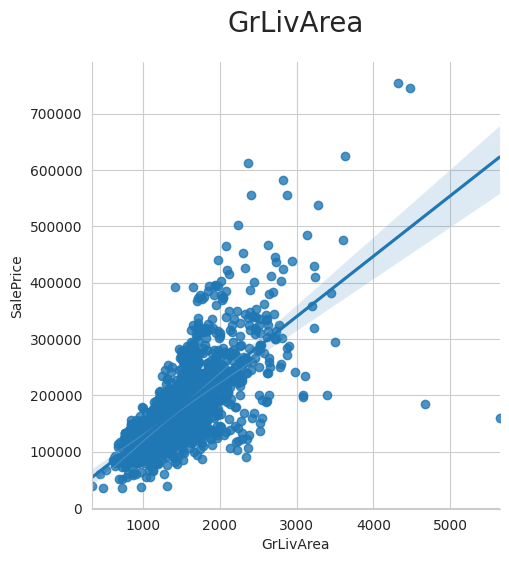

<Figure size 1000x500 with 0 Axes>

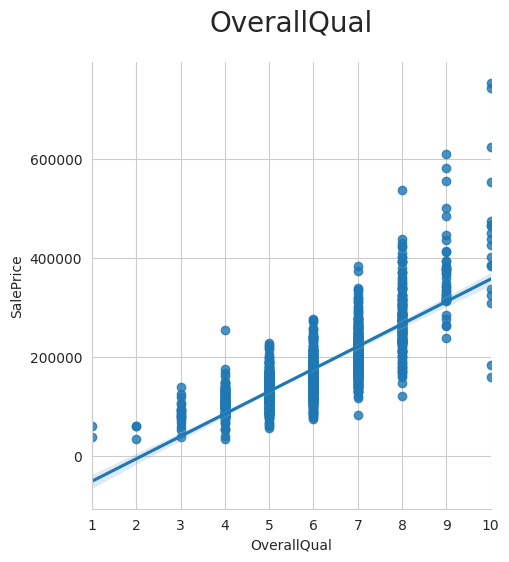

<Figure size 1000x500 with 0 Axes>

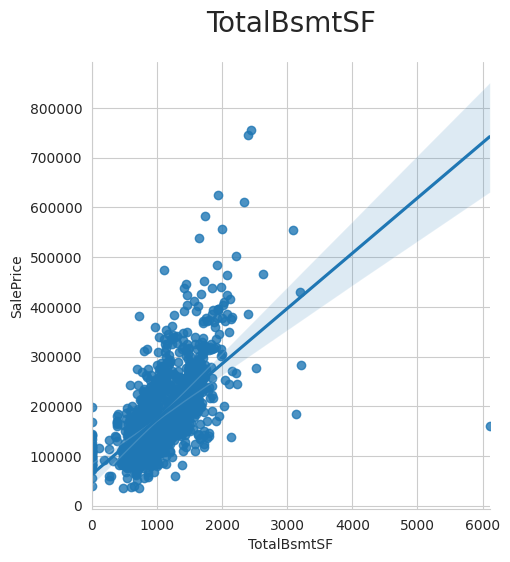

<Figure size 1000x500 with 0 Axes>

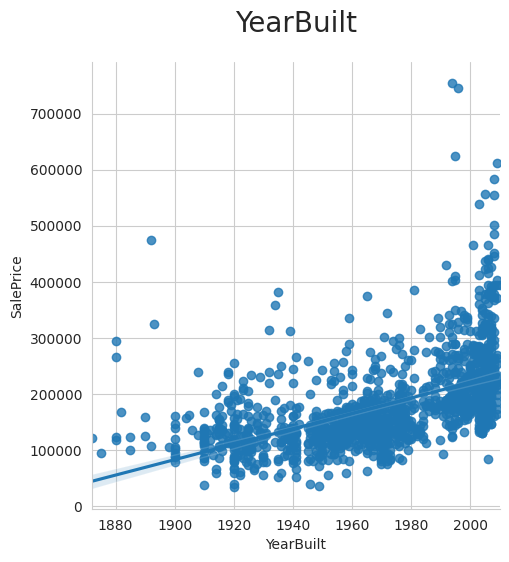

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(10, 5))
    sns.lmplot(data=df, x=col, y=target_var)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

target_var = 'SalePrice'
for col in vars_to_study:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")


From the graphs above we can see all of our features we have selected for best correlation all have a positive correlation.

---

# Conclusions and next steps

From the correlation study we found that these features all have a strong to moderate correlation with the Sale Price of the house:
* 1stFlrSF - First Floor square feet
* GarageArea - Size of garage in square feet
* GrLivArea - Above grade (ground) living area square feet
* OverallQual - Rates the overall material and finish of the house
* TotalBsmtSF - Total square feet of basement area
* YearBuilt - Original construction date

When we plotted the above features against the sale price, we were able to make the interpretation:

* The sale price is typically higher the greater the first floor square feet is.
* The sale price is typically higher the greater the garage square feet is.
* The sale price is typically higher the greater the above ground living area square feet is.
* The sale price is typically higher the better the overall materials and finish of the house is.
* The sale price is typically higher the greater the total square feet of the basement area is.
* The sale price is typically higher the new the house is. 

Our next step will be to clean the data in preparation for the Modelling and answer business requirement 2

---